In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
from sklearn.linear_model import LinearRegression
from kaggler.metrics import plot_roc_curve, plot_pr_curve

In [3]:
rcParams['figure.figsize'] = (16,8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option('display.precision', 4)
warnings.simplefilter('ignore')


In [4]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 0229-7A65

 C:\Users\qhxma\OneDrive\바탕 화면\4학년2학기\단국대 데이콘 데이터 분석대회 -소행성 예측\단국대\dku-kaggle-class\notebook 디렉터리

2020-09-14  오전 11:03    <DIR>          .
2020-09-14  오전 11:03    <DIR>          ..
2020-09-14  오전 09:16    <DIR>          .ipynb_checkpoints
2020-09-14  오전 10:59         3,082,791 03-pandas-eda.ipynb
2020-09-14  오전 10:40           371,707 04-numpy-lr.ipynb
2020-09-14  오전 11:03           475,821 3weeks_2.ipynb
               3개 파일           3,930,319 바이트
               3개 디렉터리  15,011,516,416 바이트 남음


In [5]:
data_dir = Path('..\\input')
trn_file = data_dir / 'train.csv'
test_file = data_dir / 'test.csv'
feature_file = data_dir / 'feature.csv'
seed = 40

In [6]:
trn = pd.read_csv(trn_file, index_col = 0)
trn.head()

u        g        r        i        z    redshift  dered_u  dered_g  \
id                                                                              
0   23.2640  20.3368  19.0095  17.6724  16.9396 -8.1086e-05  23.1243  20.2578   
1   15.0521  14.0620  13.4524  13.2684  13.1689  4.5061e-03  14.9664  14.0045   
2   16.7864  15.8254  15.5363  15.3935  15.3500  4.7198e-04  16.6076  15.6866   
3   25.6606  21.1887  20.2212  19.8949  19.6346  5.8143e-06  25.3536  20.9947   
4   24.4534  20.6992  19.0424  18.3242  17.9826 -3.3247e-05  23.7714  20.4338   

    dered_r  dered_i  dered_z  nObserve  nDetect  airmass_u  airmass_g  \
id                                                                       
0   18.9551  17.6321  16.9089        18       18     1.1898     1.1907   
1   13.4114  13.2363  13.1347         1        1     1.2533     1.2578   
2   15.4400  15.3217  15.2961         2        2     1.0225     1.0241   
3   20.0873  19.7947  19.5552         4        3     1.2054     1.2061   
4   18.8630  18.1903  17.8759        13       12     1.1939     1.1943   

    airmass_r  airmass_i  airmass_z  class  
id                                          
0      1.1890     1.1894     1.1902      0  
1      1.2488     1.2510     1.2555      1  
2      1.0210     1.0217     1.0233      0  
3      1.2049     1.2051     1.2057      0  
4      1.1937     1.1938     1.1941      0

In [7]:
trn.dtypes

u            float64
g            float64
r            float64
i            float64
z            float64
redshift     float64
dered_u      float64
dered_g      float64
dered_r      float64
dered_i      float64
dered_z      float64
nObserve       int64
nDetect        int64
airmass_u    float64
airmass_g    float64
airmass_r    float64
airmass_i    float64
airmass_z    float64
class          int64
dtype: object

In [8]:
trn['class'].value_counts().sort_index()

0    119996
1     42785
2    157219
Name: class, dtype: int64

In [9]:
trn_sample = trn.sample(n=30000, random_state=seed)

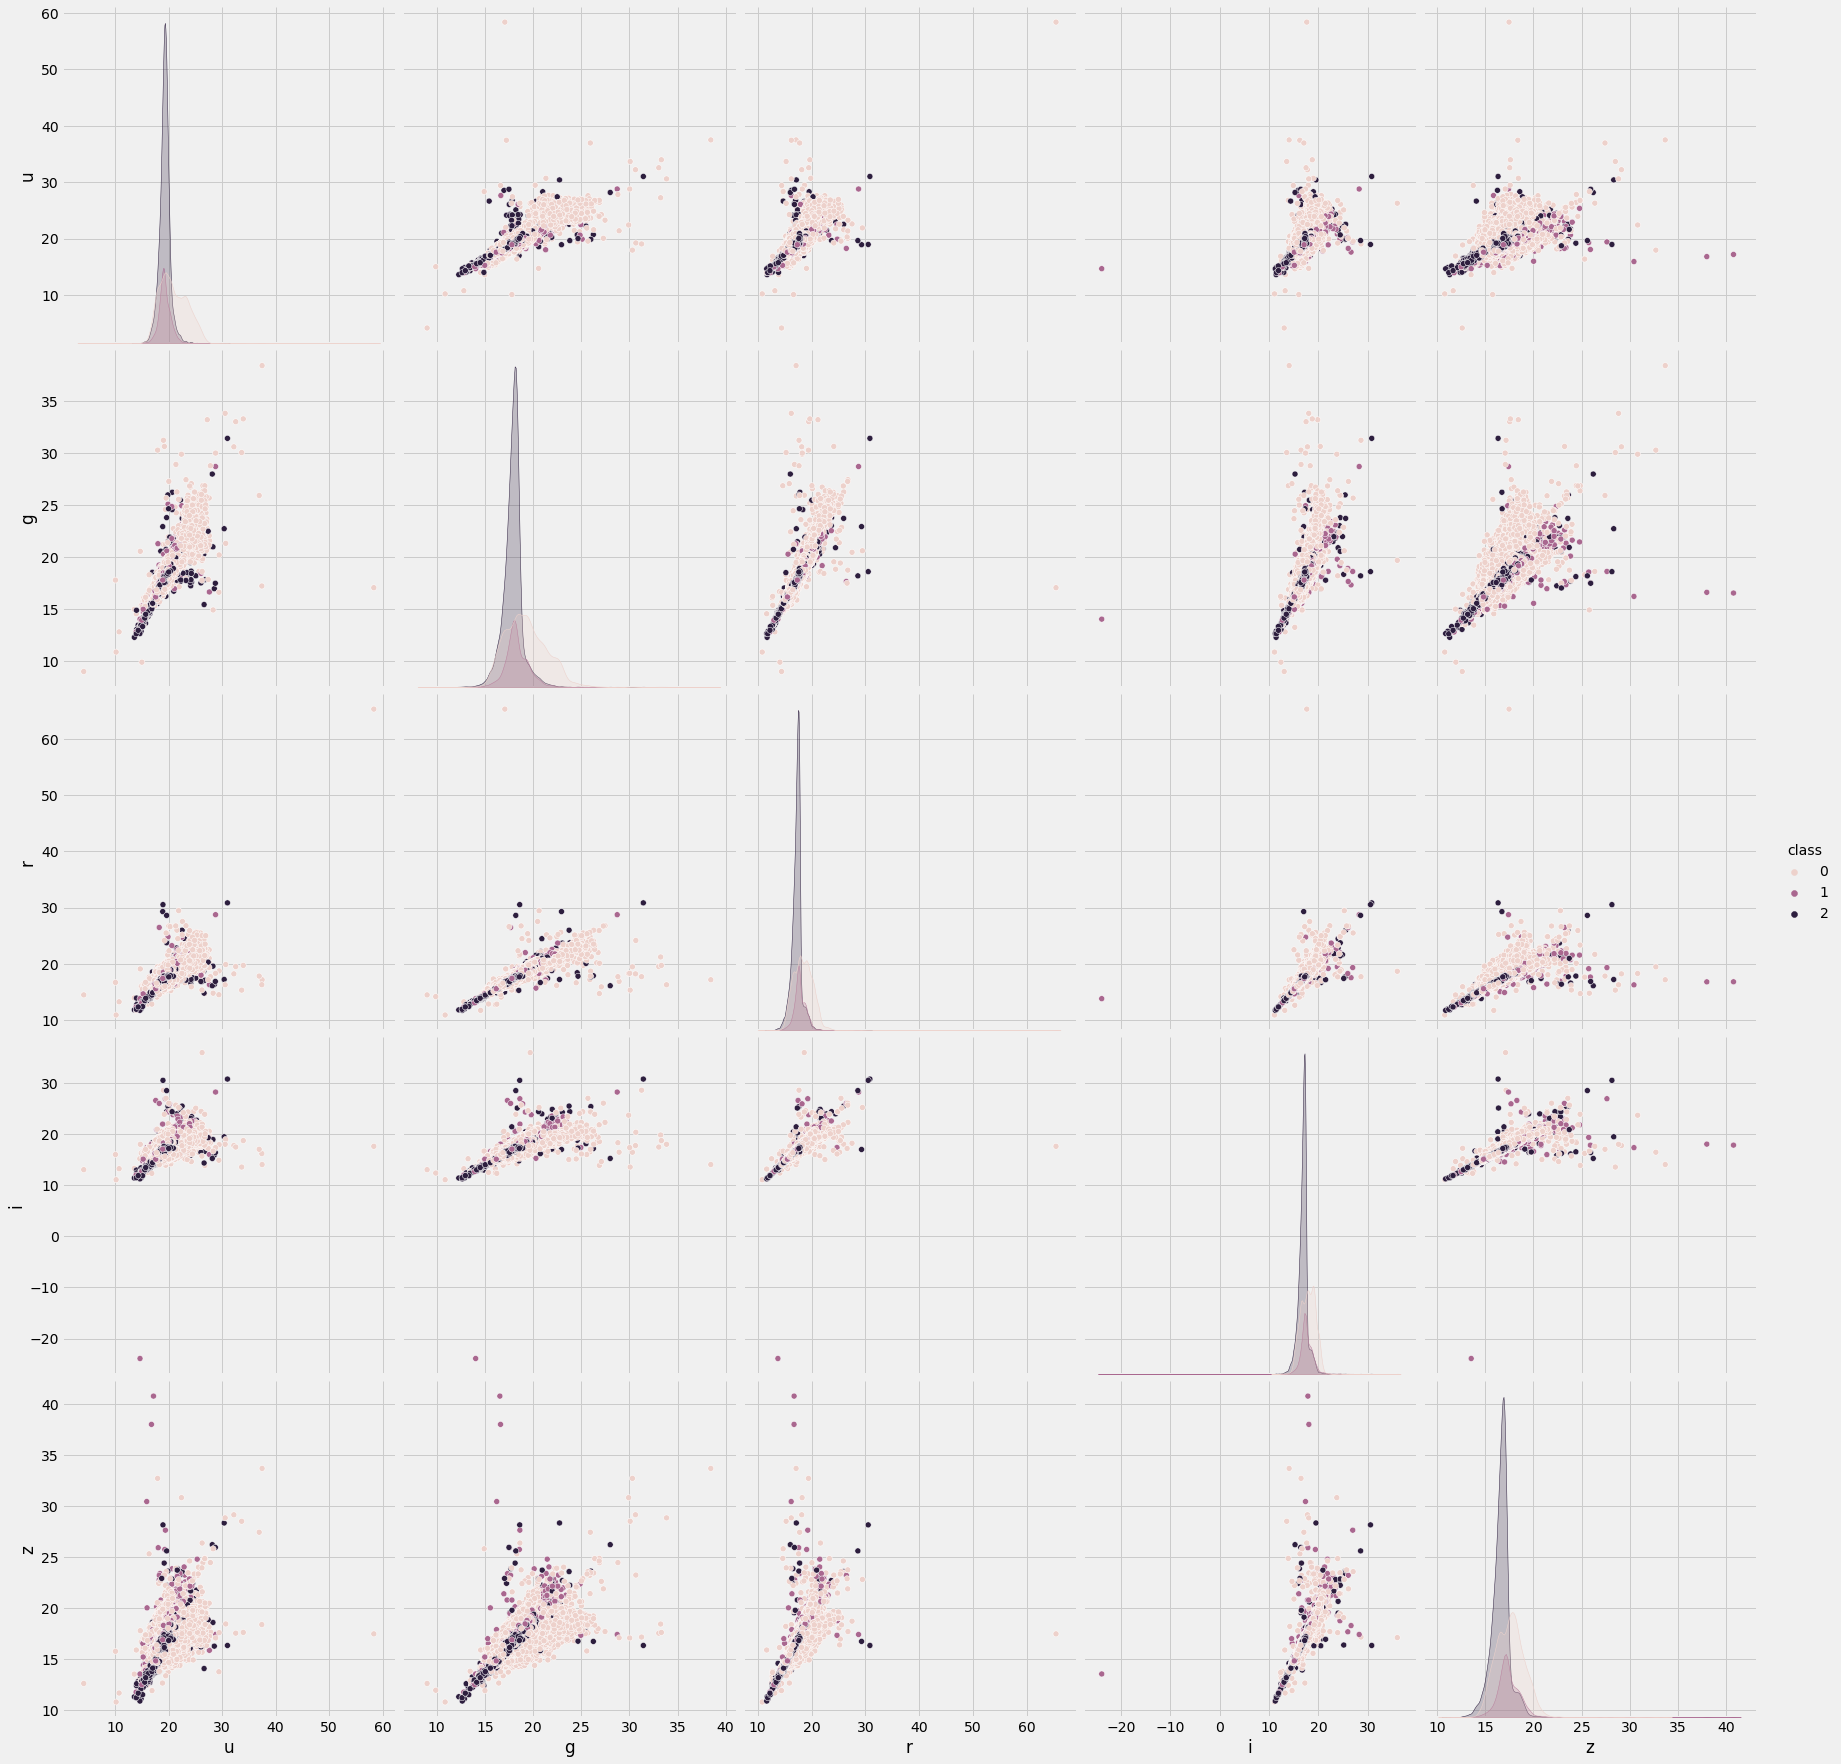

In [10]:
sns.pairplot(data=trn_sample, vars=['u', 'g', 'r', 'i', 'z'], hue='class', size=5)

In [11]:
trn.shape

(320000, 19)

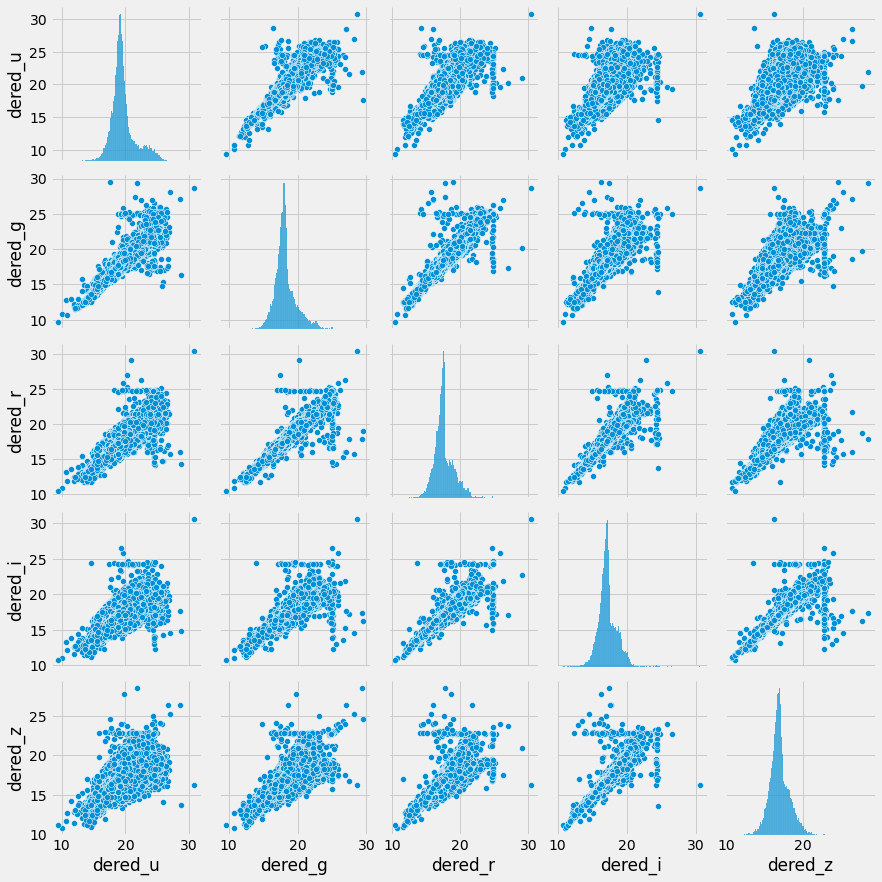

In [12]:
sns.pairplot(data=trn_sample, vars=['dered_u','dered_g','dered_r','dered_i','dered_z'])

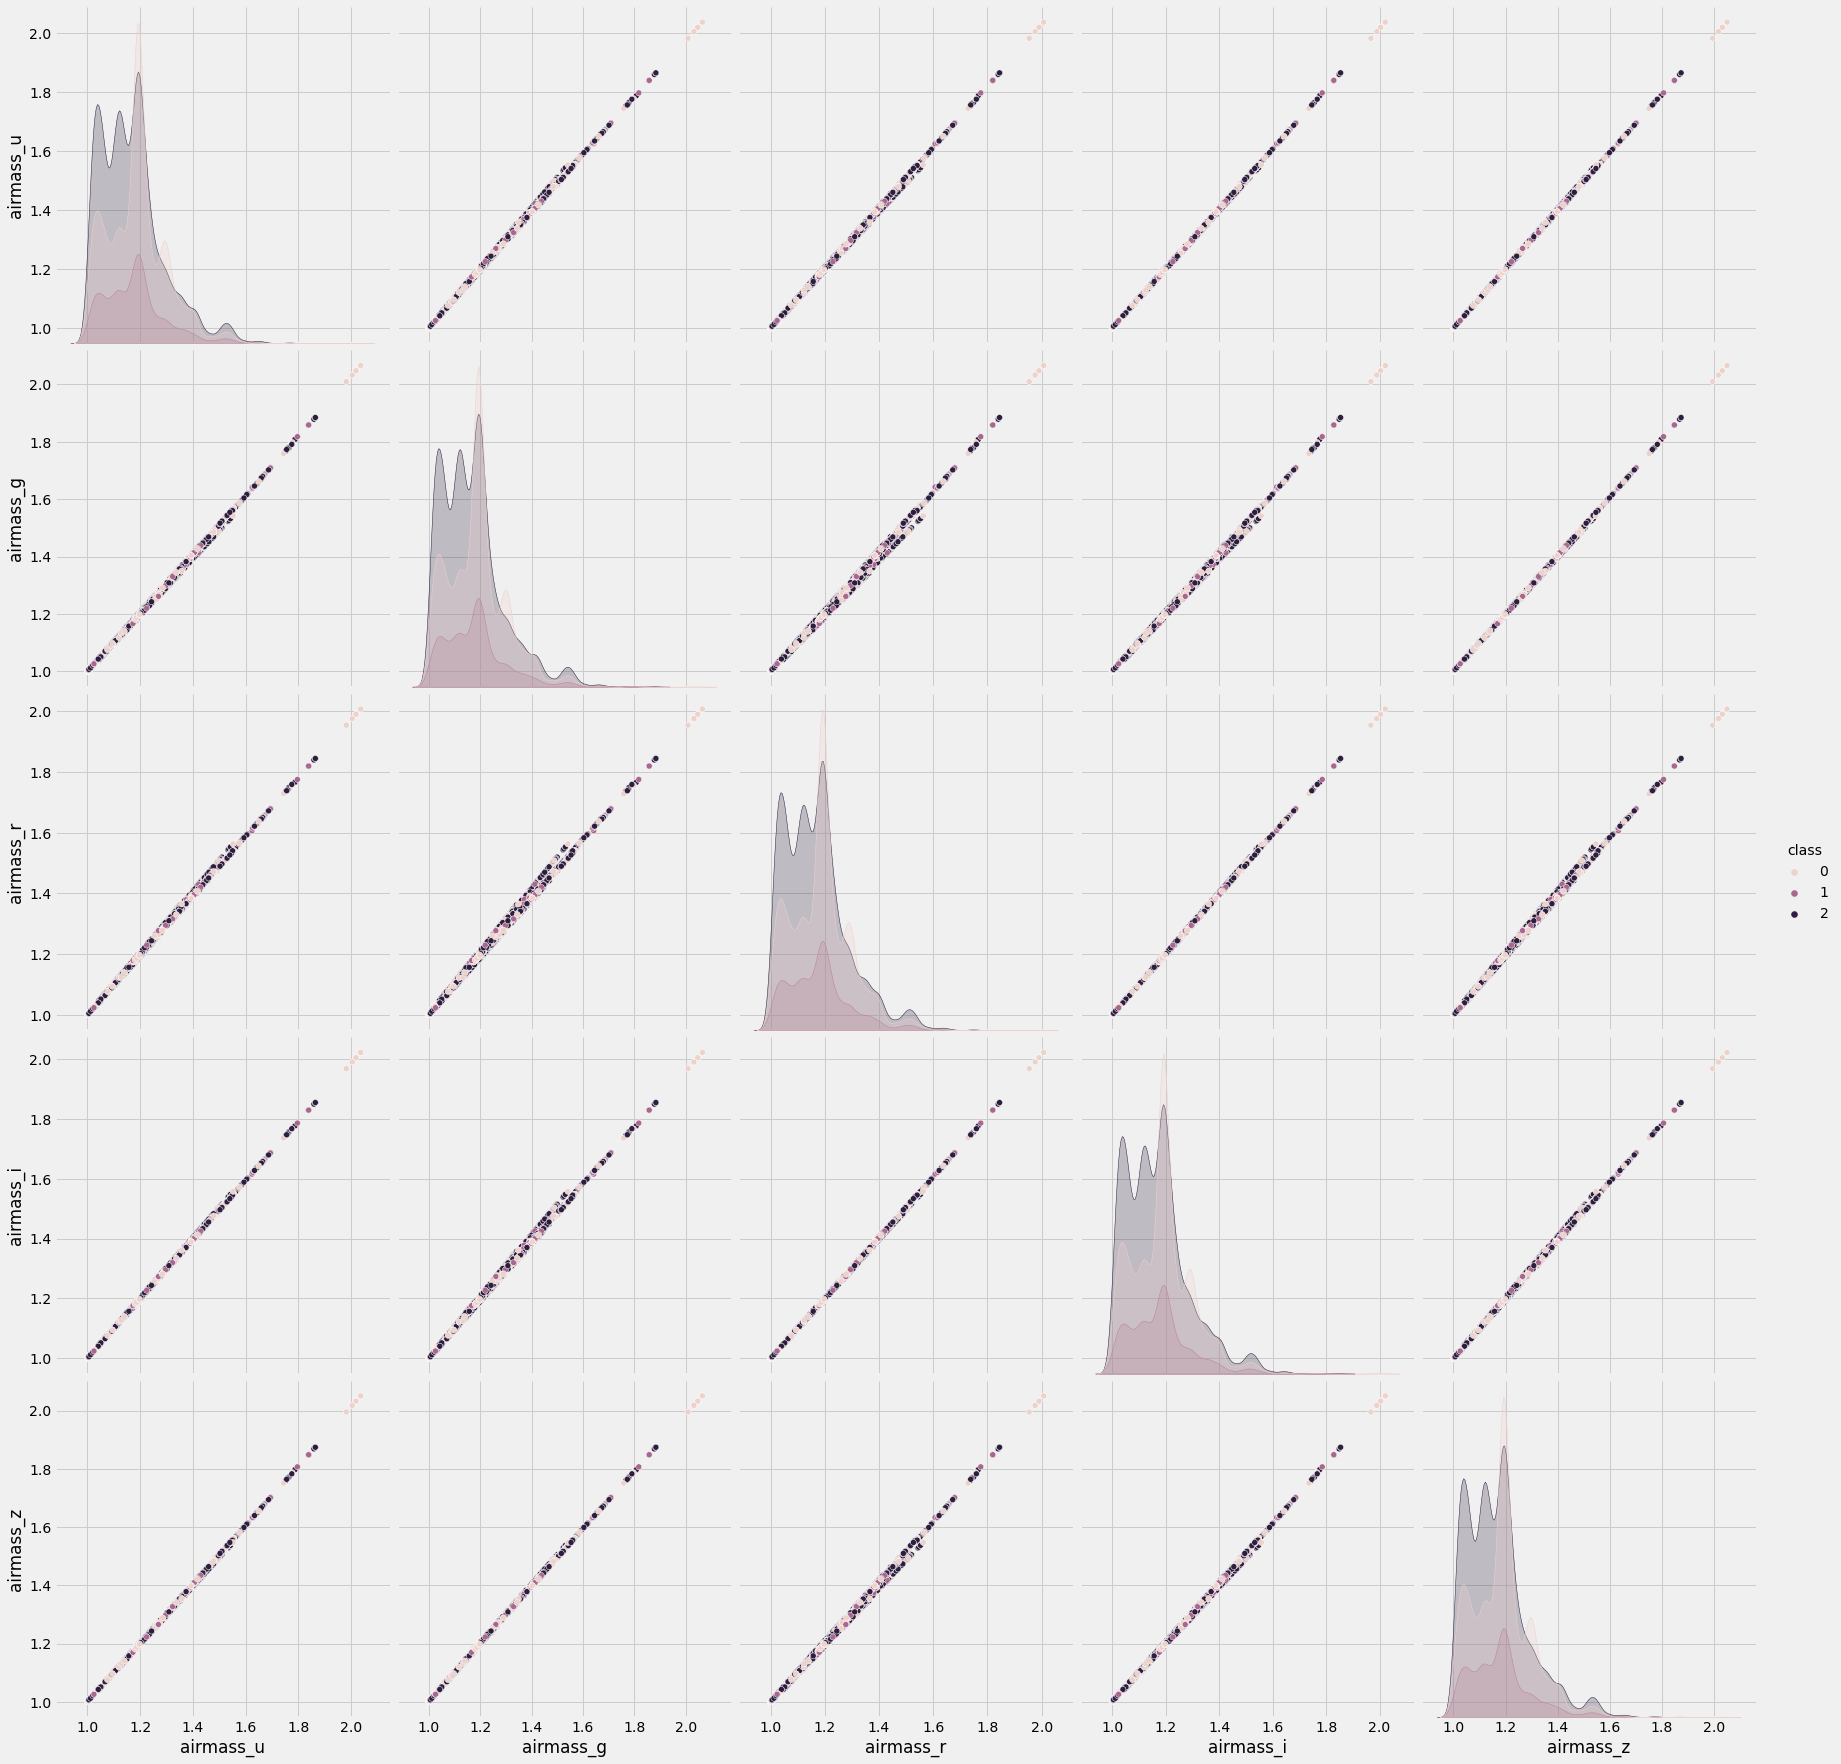

In [13]:
sns.pairplot(data=trn_sample, vars=['airmass_u', 'airmass_g', 'airmass_r', 'airmass_i', 'airmass_z'], hue='class', size=5)

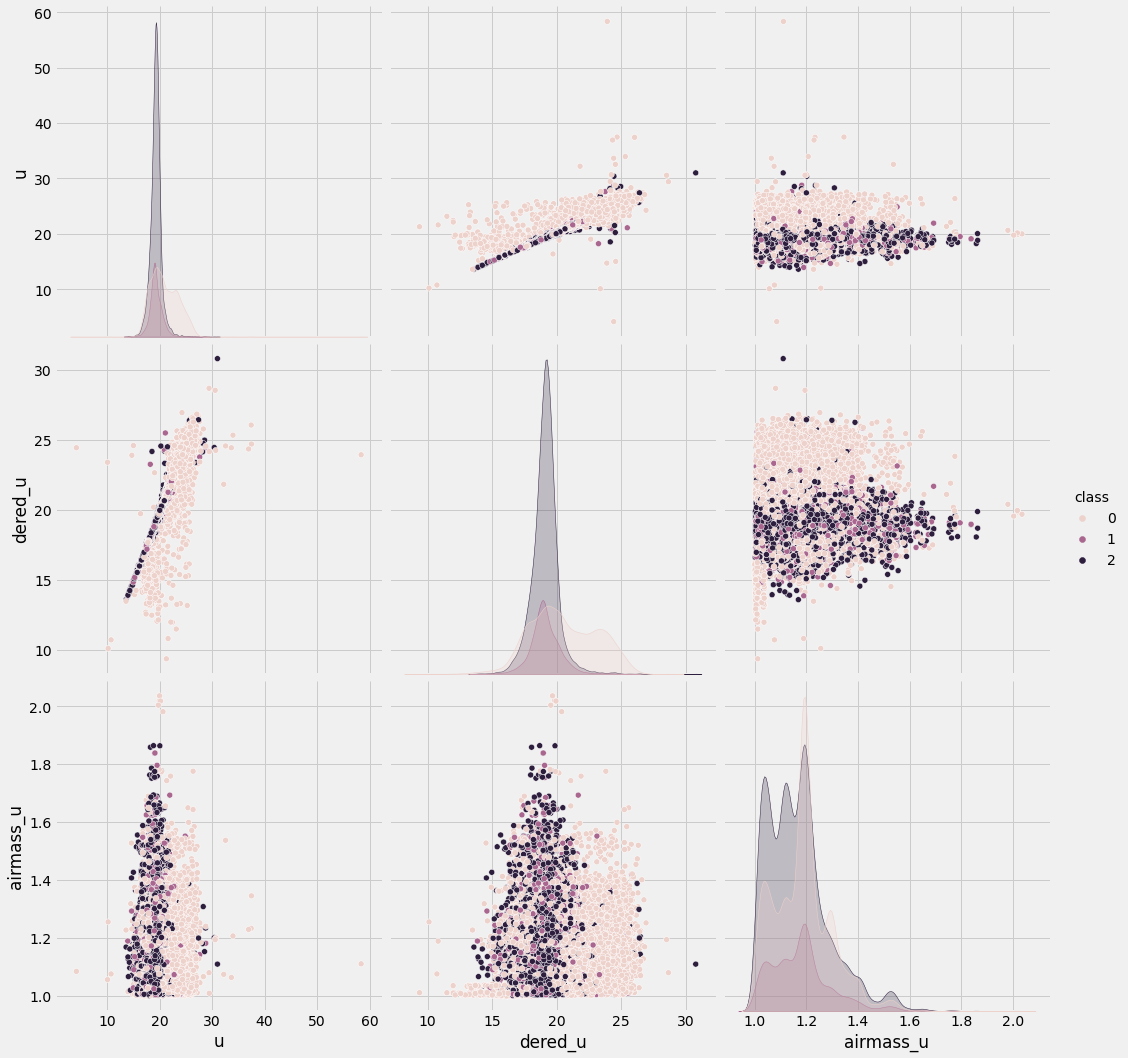

In [14]:
sns.pairplot(data=trn_sample, vars=['u', 'dered_u', 'airmass_u'], hue='class', size=5)

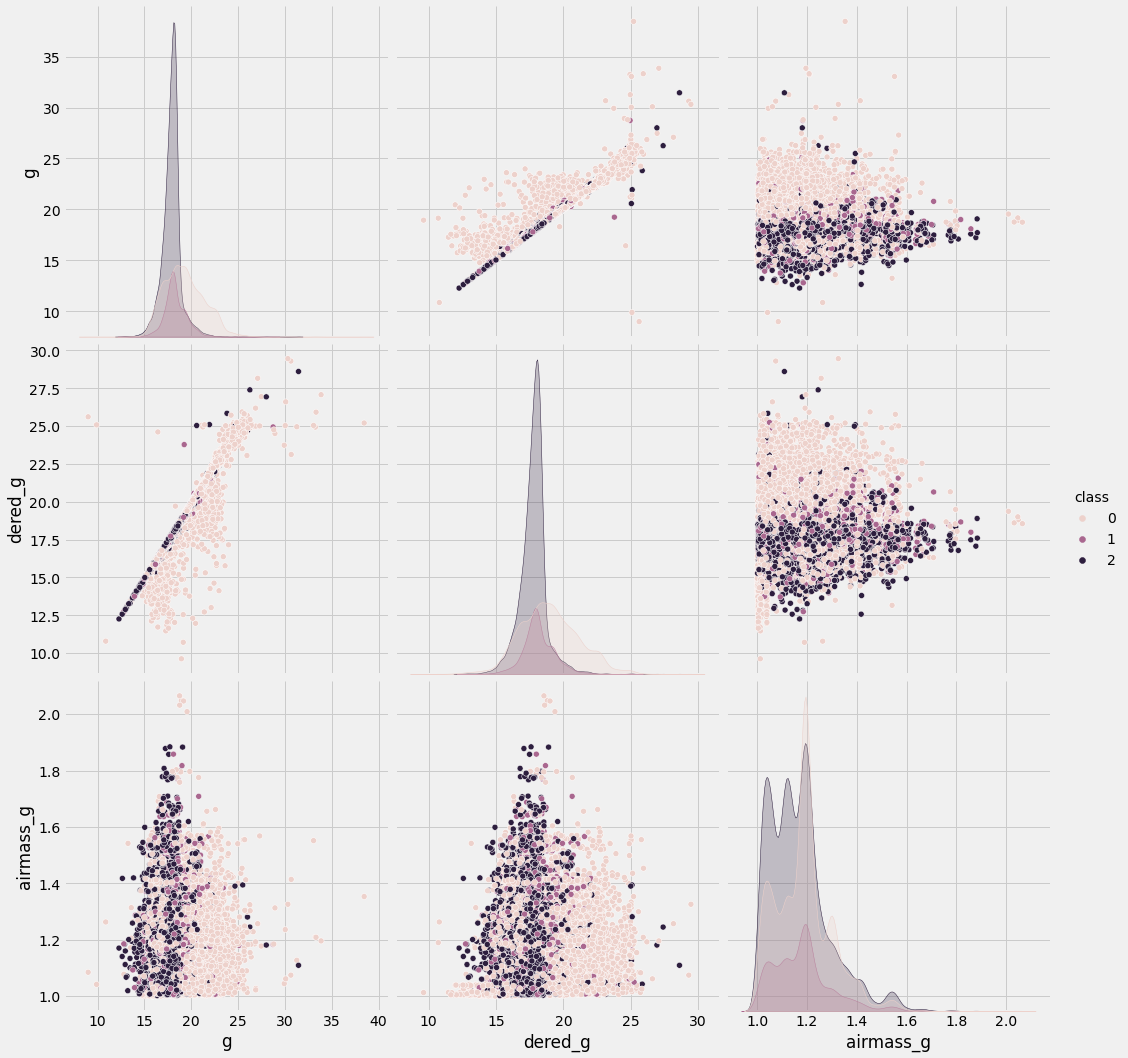

In [15]:
sns.pairplot(data=trn_sample, vars=['g', 'dered_g', 'airmass_g'], hue='class', size=5)

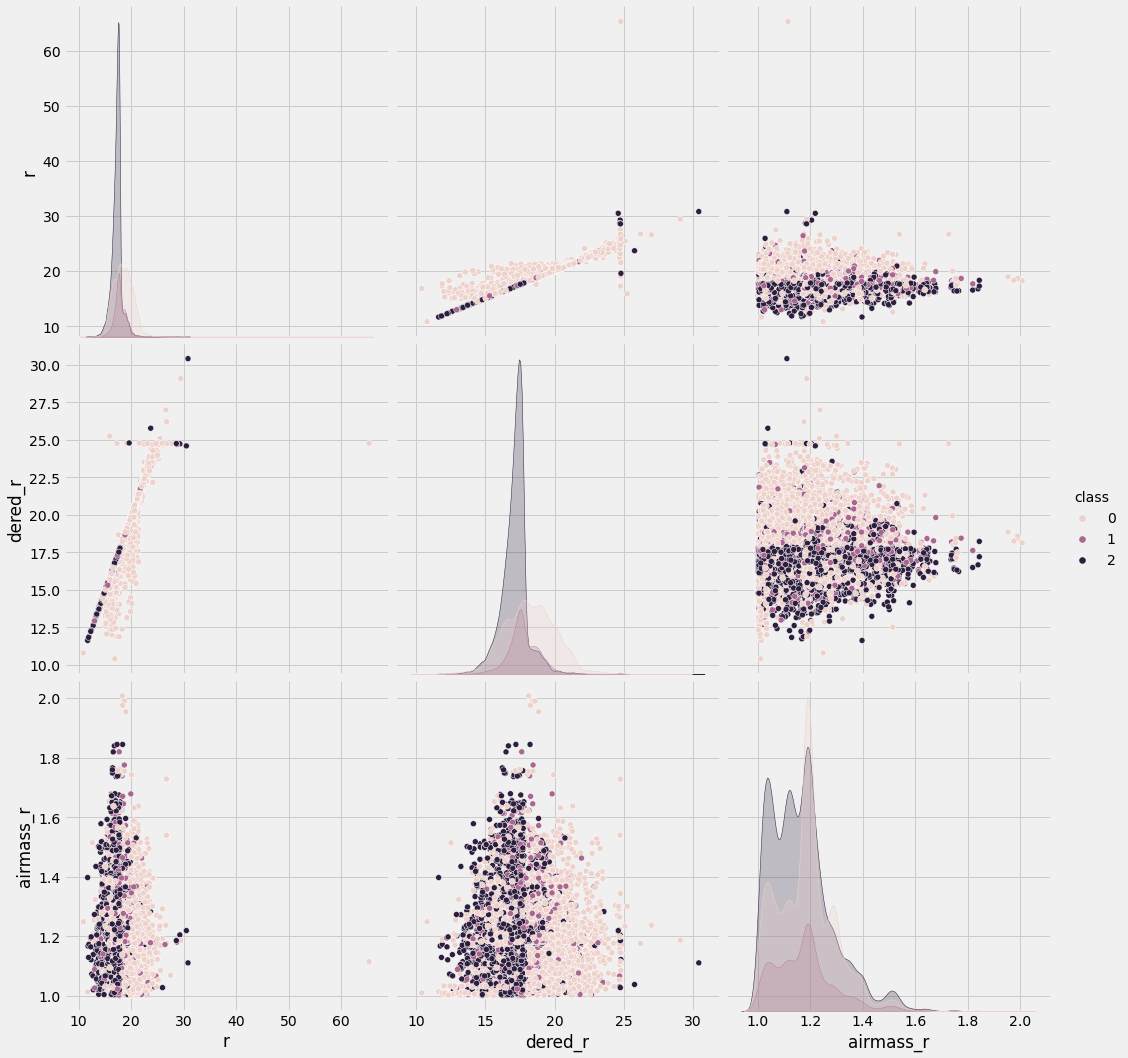

In [16]:
sns.pairplot(data=trn_sample, vars=['r', 'dered_r', 'airmass_r'], hue='class', size=5)

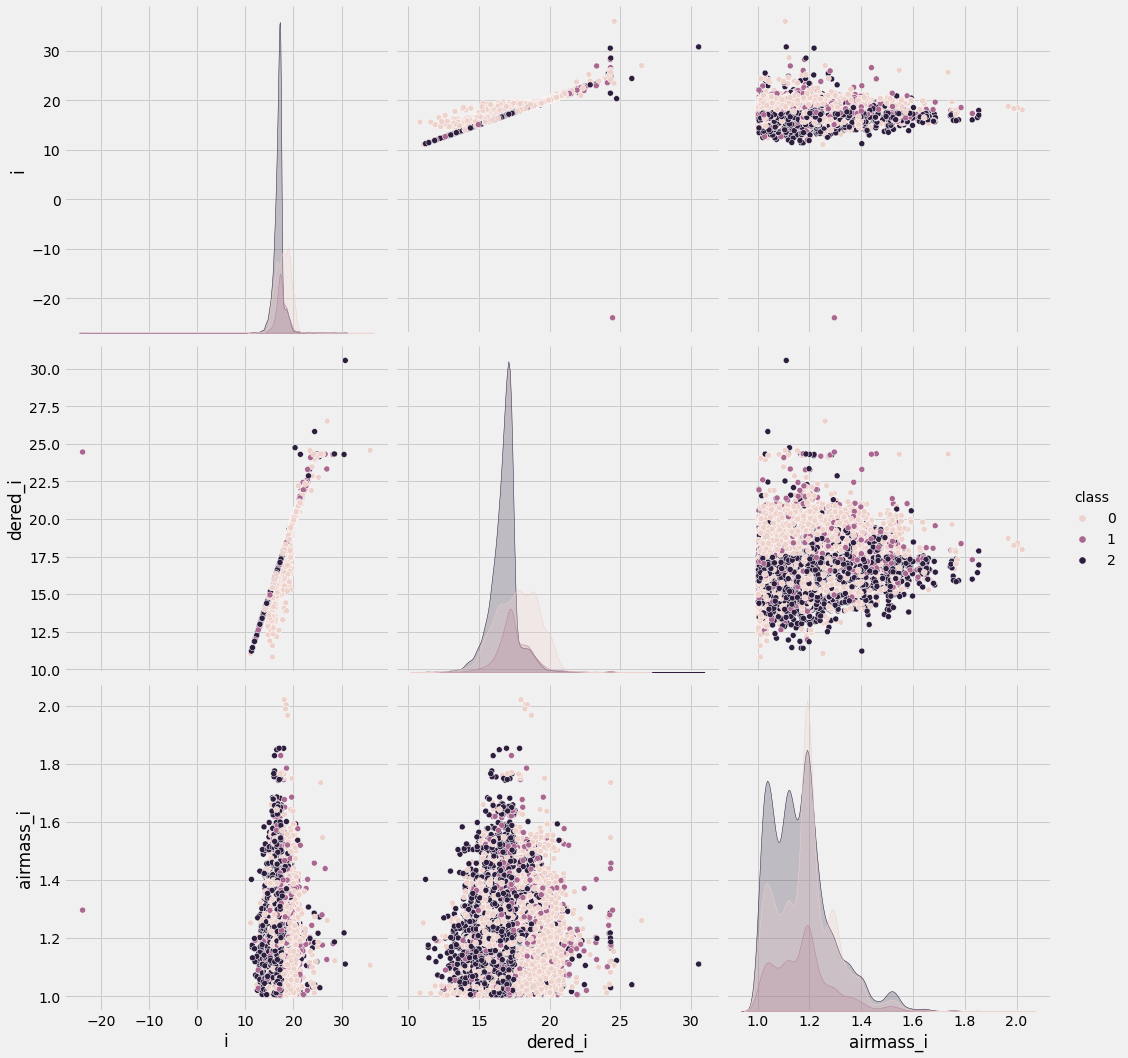

In [17]:
sns.pairplot(data=trn_sample, vars=['i', 'dered_i', 'airmass_i'], hue='class', size=5)

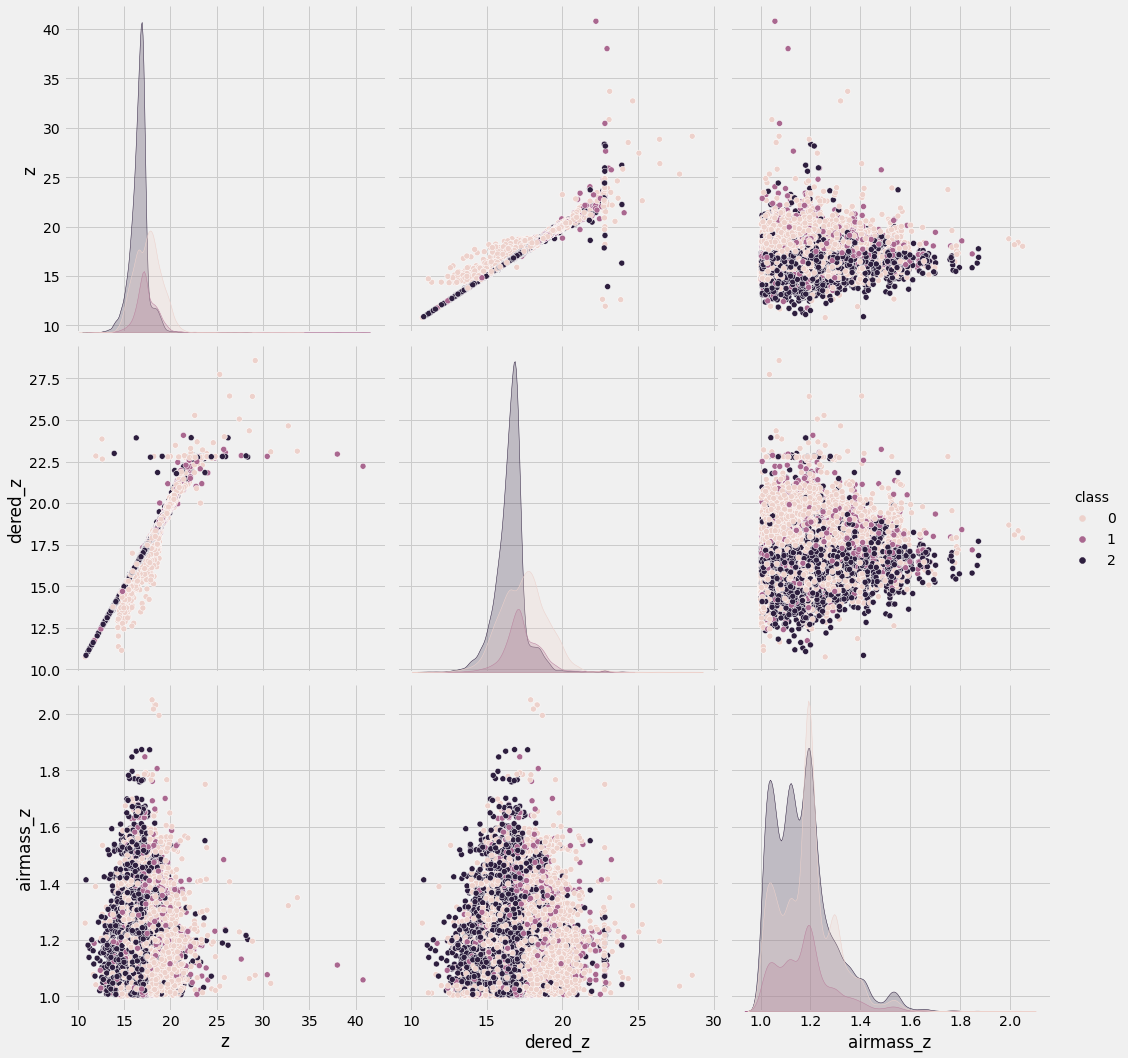

In [18]:
sns.pairplot(data=trn_sample, vars=['z', 'dered_z', 'airmass_z'], hue='class', size=5)

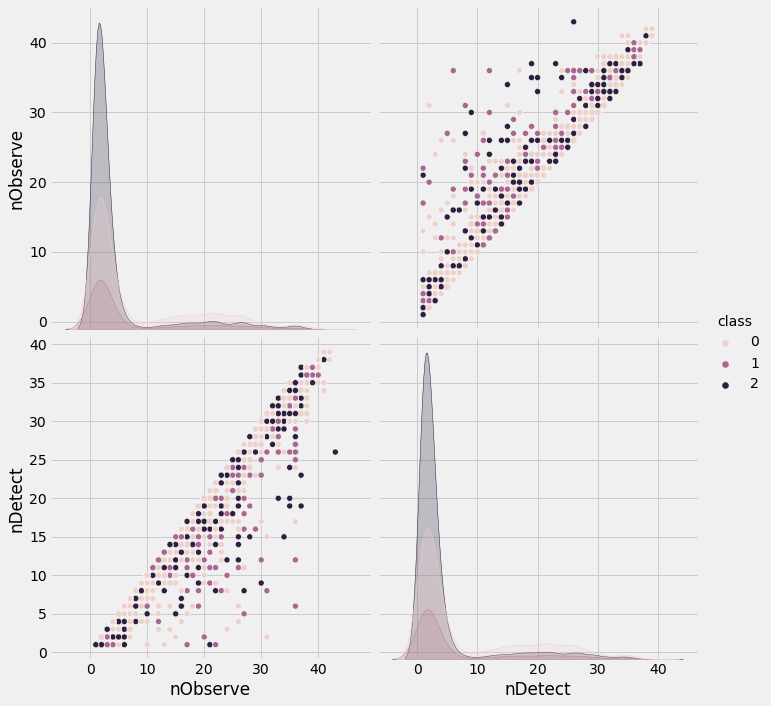

In [19]:
sns.pairplot(data=trn_sample, vars=['nObserve', 'nDetect'], hue='class', size=5)

In [22]:
tst = pd.read_csv(test_file, index_col=0)
print(tst.shape)
tst.head()

(80000, 18)


u        g        r        i        z    redshift  dered_u  \
id                                                                         
320000  19.1431  18.0172  17.4733  17.1144  16.9263  1.2130e-01  19.0750   
320001  18.7409  17.1705  16.3691  15.9865  15.7307 -6.6907e-05  15.0703   
320002  19.2980  17.8803  17.2221  16.8096  16.6352  1.1001e-01  19.1004   
320003  18.0775  17.1569  16.9041  16.8118  16.7955  2.9697e-05  17.9729   
320004  17.8325  16.7646  16.2135  15.8722  15.6621  6.8471e-02  17.7545   

        dered_g  dered_r  dered_i  dered_z  nObserve  nDetect  airmass_u  \
id                                                                         
320000  17.9550  17.4308  17.0838  16.9087         1        1     1.1563   
320001  14.3098  14.3901  14.5160  14.6372         2        2     1.0076   
320002  17.7726  17.1460  16.7497  16.5689         1        1     1.3809   
320003  17.0735  16.8470  16.7700  16.7668         1        1     1.1408   
320004  16.6794  16.1563  15.8315  15.6433         2        2     1.1110   

        airmass_g  airmass_r  airmass_i  airmass_z  
id                                                  
320000     1.1515     1.1613     1.1588     1.1539  
320001     1.0074     1.0080     1.0078     1.0075  
320002     1.3905     1.3715     1.3761     1.3856  
320003     1.1408     1.1409     1.1408     1.1408  
320004     1.1077     1.1145     1.1127     1.1093

In [23]:
df = pd.concat([trn,tst], axis=0)
print(df.shape)
df.tail()

(400000, 19)


u        g        r        i        z  redshift  dered_u  \
id                                                                       
399995  19.6734  18.6617  18.2708  18.1225  18.0627   -0.0003  19.3361   
399996  21.5229  20.7283  20.6087  21.0049  20.8458    0.0655  21.3993   
399997  19.3991  18.2411  18.1605  18.1978  18.2018   -0.0008  18.9136   
399998  18.8997  17.6009  17.1329  16.8223  16.5946    0.0428  18.7715   
399999  20.7587  20.4252  20.5362  20.7729  20.9698    0.0003  20.4958   

        dered_g  dered_r  dered_i  dered_z  nObserve  nDetect  airmass_u  \
id                                                                         
399995  18.3933  18.0860  17.9861  17.9670        17       17     1.1858   
399996  20.6399  20.5451  20.9507  20.7827         8        4     1.2850   
399997  17.8753  17.9047  18.0043  18.0400         1        1     1.1885   
399998  17.4880  17.0557  16.7660  16.5585        17       17     1.1804   
399999  20.2181  20.3939  20.6696  20.9085         5        5     1.1832   

        airmass_g  airmass_r  airmass_i  airmass_z  class  
id                                                         
399995     1.1863     1.1855     1.1857     1.1861    NaN  
399996     1.2908     1.2793     1.2821     1.2878    NaN  
399997     1.1886     1.1885     1.1885     1.1885    NaN  
399998     1.1813     1.1797     1.1800     1.1809    NaN  
399999     1.1775     1.1889     1.1860     1.1803    NaN

In [24]:
df.fillna(-1, inplace=True)
df.tail()

u        g        r        i        z  redshift  dered_u  \
id                                                                       
399995  19.6734  18.6617  18.2708  18.1225  18.0627   -0.0003  19.3361   
399996  21.5229  20.7283  20.6087  21.0049  20.8458    0.0655  21.3993   
399997  19.3991  18.2411  18.1605  18.1978  18.2018   -0.0008  18.9136   
399998  18.8997  17.6009  17.1329  16.8223  16.5946    0.0428  18.7715   
399999  20.7587  20.4252  20.5362  20.7729  20.9698    0.0003  20.4958   

        dered_g  dered_r  dered_i  dered_z  nObserve  nDetect  airmass_u  \
id                                                                         
399995  18.3933  18.0860  17.9861  17.9670        17       17     1.1858   
399996  20.6399  20.5451  20.9507  20.7827         8        4     1.2850   
399997  17.8753  17.9047  18.0043  18.0400         1        1     1.1885   
399998  17.4880  17.0557  16.7660  16.5585        17       17     1.1804   
399999  20.2181  20.3939  20.6696  20.9085         5        5     1.1832   

        airmass_g  airmass_r  airmass_i  airmass_z  class  
id                                                         
399995     1.1863     1.1855     1.1857     1.1861   -1.0  
399996     1.2908     1.2793     1.2821     1.2878   -1.0  
399997     1.1886     1.1885     1.1885     1.1885   -1.0  
399998     1.1813     1.1797     1.1800     1.1809   -1.0  
399999     1.1775     1.1889     1.1860     1.1803   -1.0

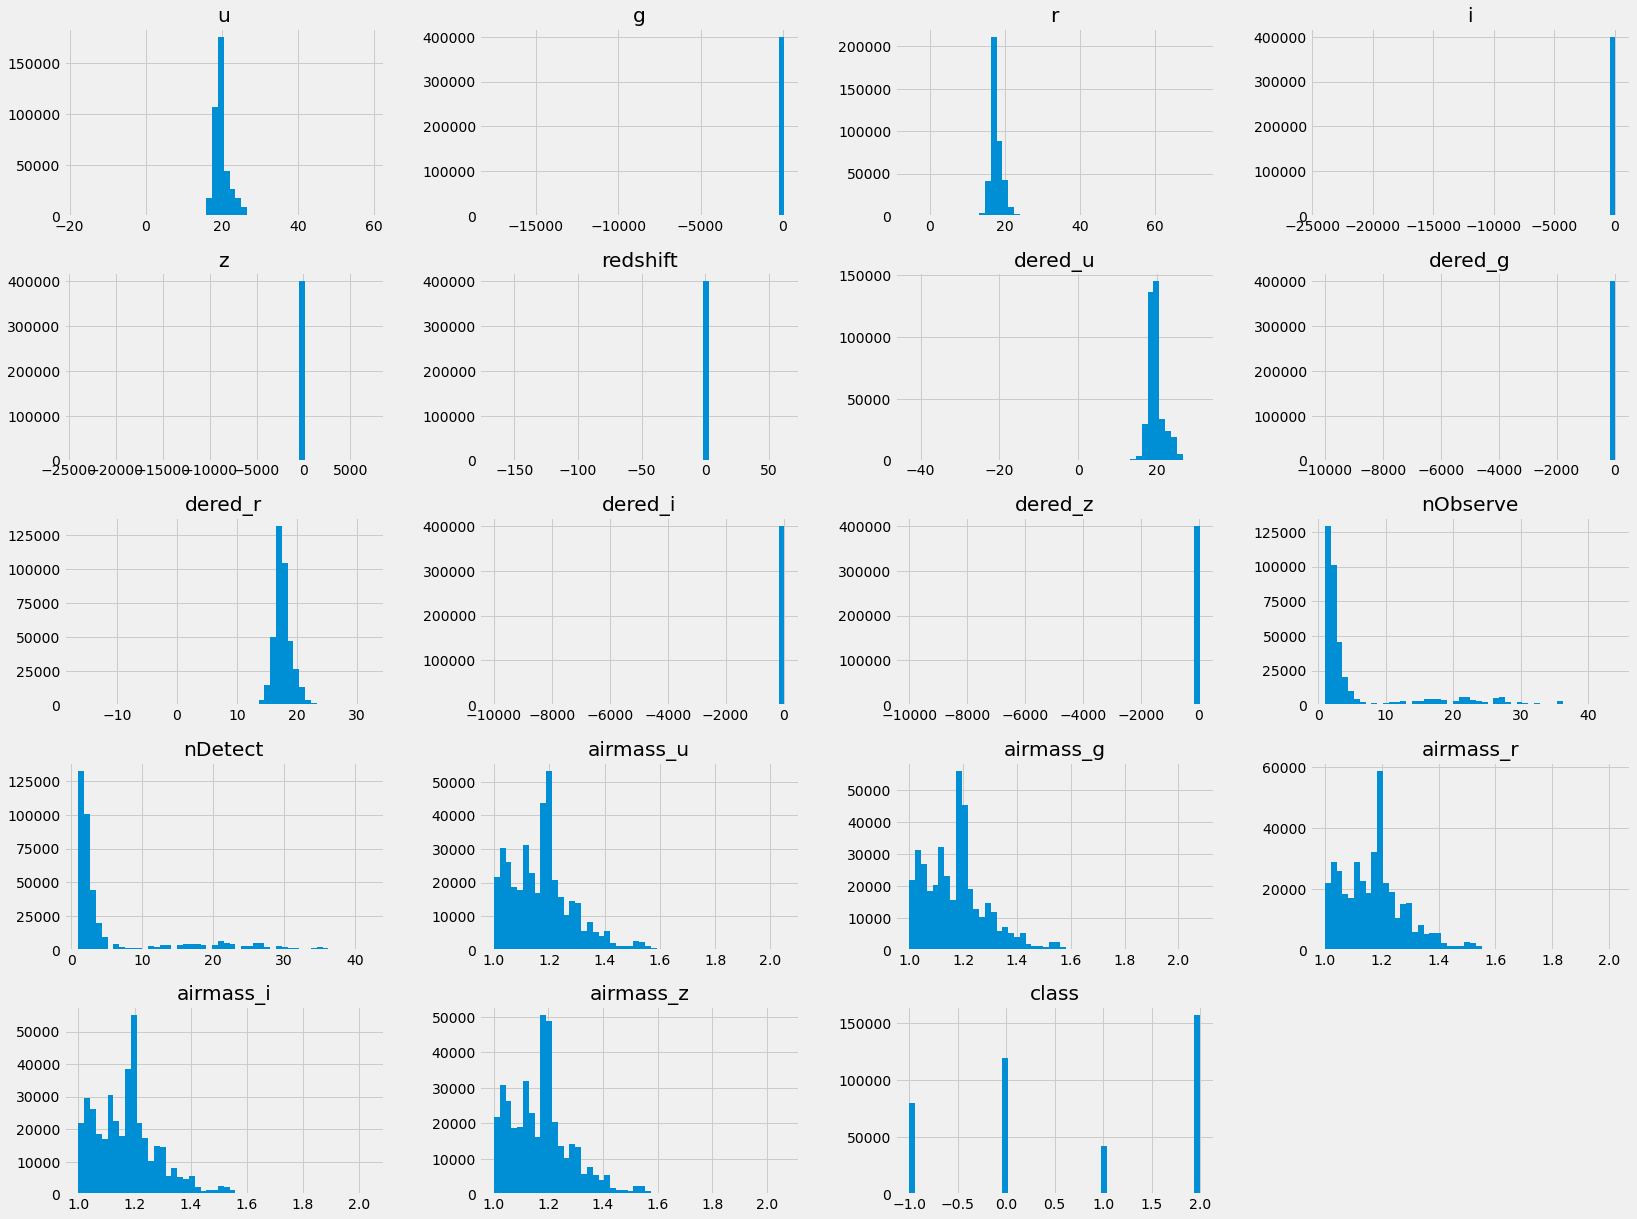

In [29]:
df.hist(bins=50, figsize=(25,20))
plt.show()

In [30]:
df.corr().style.background_gradient() #train+test

In [34]:
trn.corr().style.background_gradient()#train

In [33]:
df_copy = df.copy()

In [35]:
df_copy.drop(['dered_u','dered_g','dered_r','dered_i','dered_z', 'nDetect'],axis=1, inplace=True)

In [36]:
df_copy.corr().style.background_gradient()

# outlier 제거

In [47]:
from collections import Counter 

def detect_outliers(df, n, features): 
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25) 
        Q3 = np.percentile(df[col], 75) 
        IQR = Q3 - Q1 
        
        outlier_step = 1.5 * IQR 
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index 
        outlier_indices.extend(outlier_list_col) 
        
    outlier_indices = Counter(outlier_indices) 
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n) 
        
    return multiple_outliers 

#Outliers_to_drop = detect_outliers(df_train, 2, ["변수명"])



In [83]:
trn_copy = trn.copy()

In [84]:
feature_col_name = list(trn_copy.columns[:-1])

In [85]:
feature_col_name

['u',
 'g',
 'r',
 'i',
 'z',
 'redshift',
 'dered_u',
 'dered_g',
 'dered_r',
 'dered_i',
 'dered_z',
 'nObserve',
 'nDetect',
 'airmass_u',
 'airmass_g',
 'airmass_r',
 'airmass_i',
 'airmass_z']

In [86]:
for i in feature_col_name:
    Outliers_to_drop = detect_outliers(trn_copy,2,feature_col_name)
    trn_copy = trn_copy.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [57]:
feature_col_name = list(df_copy.columns[:-1])

In [59]:
feature_col_name

['u',
 'g',
 'r',
 'i',
 'z',
 'redshift',
 'nObserve',
 'airmass_u',
 'airmass_g',
 'airmass_r',
 'airmass_i',
 'airmass_z']

In [60]:
for i in feature_col_name:
    Outliers_to_drop = detect_outliers(df_copy,2,feature_col_name)
    df_copy = df_copy.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

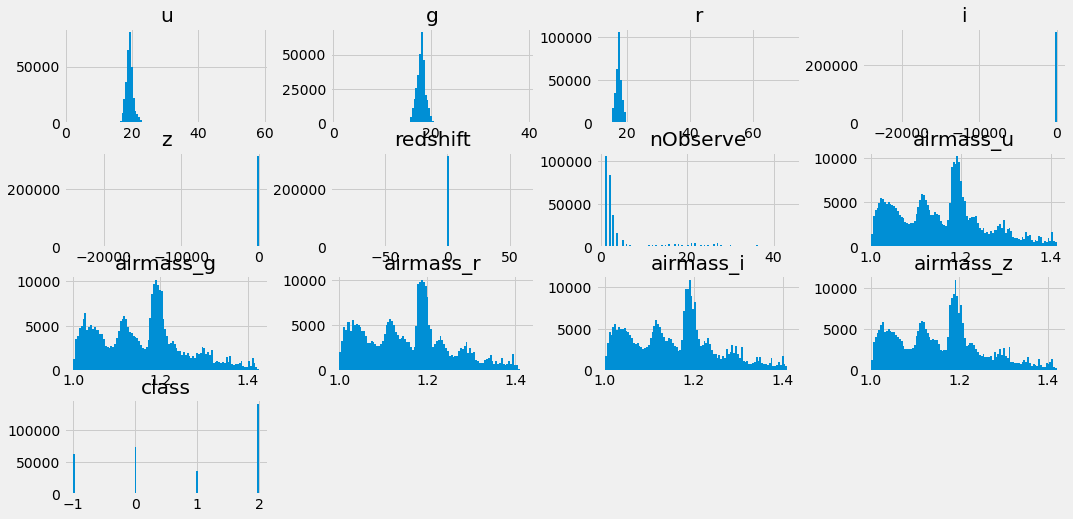

In [65]:
df_copy.hist(bins = 100)
plt.show()

In [66]:
df_copy.corr().style.background_gradient()

## RMSE 손실함수 정의

In [68]:
rmse = lambda y, p: np.sqrt(np.mean((y - p) ** 2)) #MSE에 루트를 씌운 것- 
# 쓰는 이유 값들의 scalie 이 매우 클 때
#labda 입력 값 : 짧은 함수 내용 

In [69]:
def rmse(y,p):
    return np.sqrt(np.mean((y-p) **2))

# 선형회귀

In [87]:
X_u = df_copy['u'].values.reshape(-1, 1)
X_g = df_copy['g'].values.reshape(-1, 1)
Y_r = df_copy['r'].values

X_i = df_copy['i'].values.reshape(-1, 1)
Y_z = df_copy['z'].values
# X_u = trn_copy['u'].values.reshape(-1, 1)
# X_g = trn_copy['g'].values.reshape(-1, 1)
# Y_r = trn_copy['r'].values

# X_i = trn_copy['i'].values.reshape(-1, 1)
# Y_z = trn_copy['z'].values



In [88]:
Y_r.shape

(222178,)

In [90]:
# u와 r
unr = LinearRegression()
unr.fit(X_u,Y_r)
ur_p = unr.predict(X_u) 
rmse(Y_r,ur_p)

0.5271121057667562

In [91]:
# g와 r
gnr = LinearRegression()
gnr.fit(X_g,Y_r)
gr_p = gnr.predict(X_u) 
rmse(Y_r,gr_p)

1.3129186373692432

In [92]:
# i와 z
inz = LinearRegression()
inz.fit(X_i,Y_z)
iz_p = inz.predict(X_i) 
rmse(Y_z,iz_p)

26.91766583735879

# 로지스틱 회귀

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score

In [110]:
X = trn_copy[trn_copy['class'] != 0].drop('class', axis=1)
Y = trn_copy[trn_copy['class'] != 0]['class'].values - 1

In [111]:
lr = LogisticRegression()
lr.fit(X, Y)
p = lr.predict_proba(X)[:, 1]#리턴 되는 값이 

In [112]:
lr.coef_, lr.intercept_

(array([[ 1.84457663, -0.38366361, -5.36851361,  2.19017953, -0.40361691,
         -2.43017358,  3.3816518 ,  0.58581758, -5.02757418,  2.80575219,
          0.08874889,  0.12138725, -0.12812854, -0.04103246, -0.03273073,
         -0.04915957, -0.04512575, -0.03691693]]),
 array([-0.3852591]))

In [113]:
log_loss(Y, p)

0.3074527701219269

In [114]:
roc_auc_score(Y, p)

0.8987226956731709

In [115]:
from kaggler.metrics import plot_roc_curve, plot_pr_curve

Text(0.5, 1.0, 'Precision-Recall Curve')

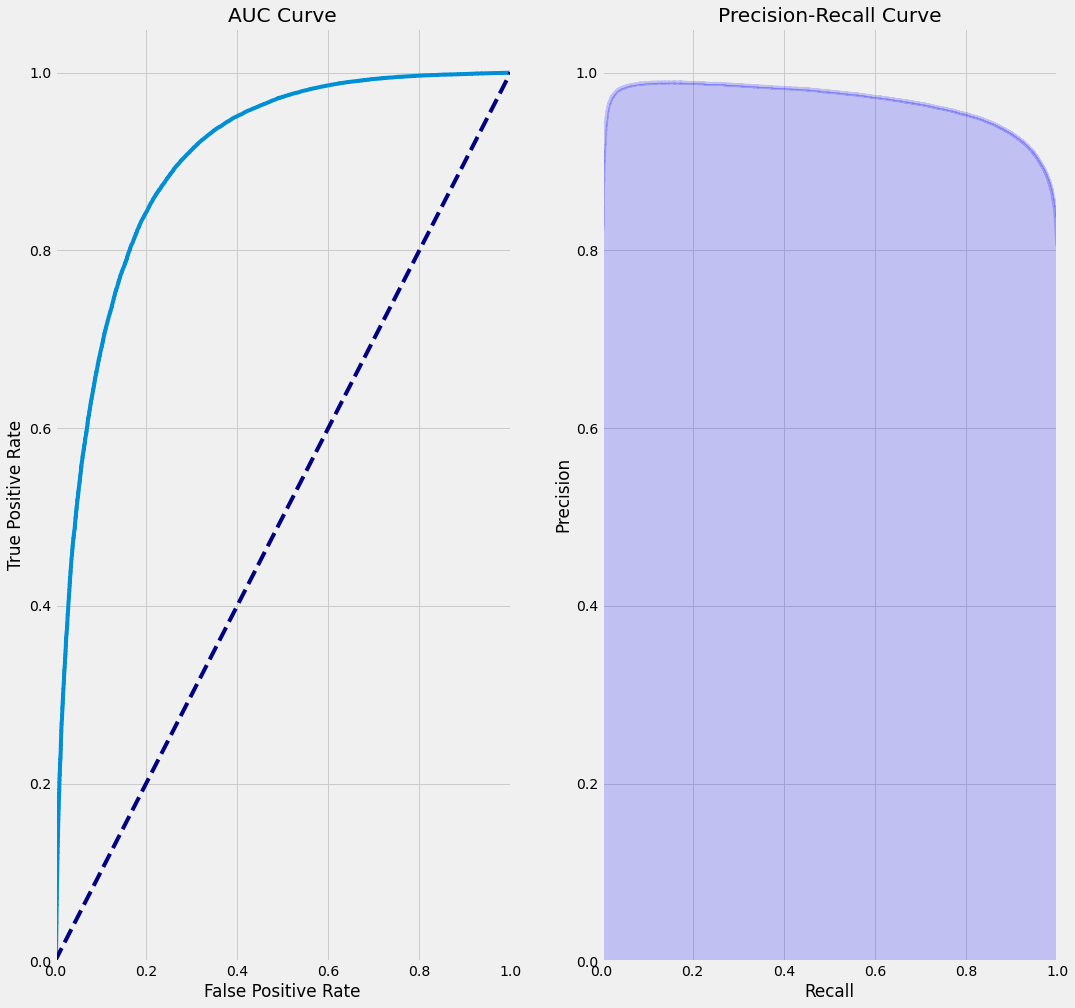

In [117]:
plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plot_roc_curve(Y, p);
plt.title('AUC Curve')
plt.subplot(1, 2, 2)
plot_pr_curve(Y, p);
plt.title('Precision-Recall Curve')